# Simulations Artefact

In [1]:
import sys      
import heapq      

# Floorplan Graphical Representations
## First Floor

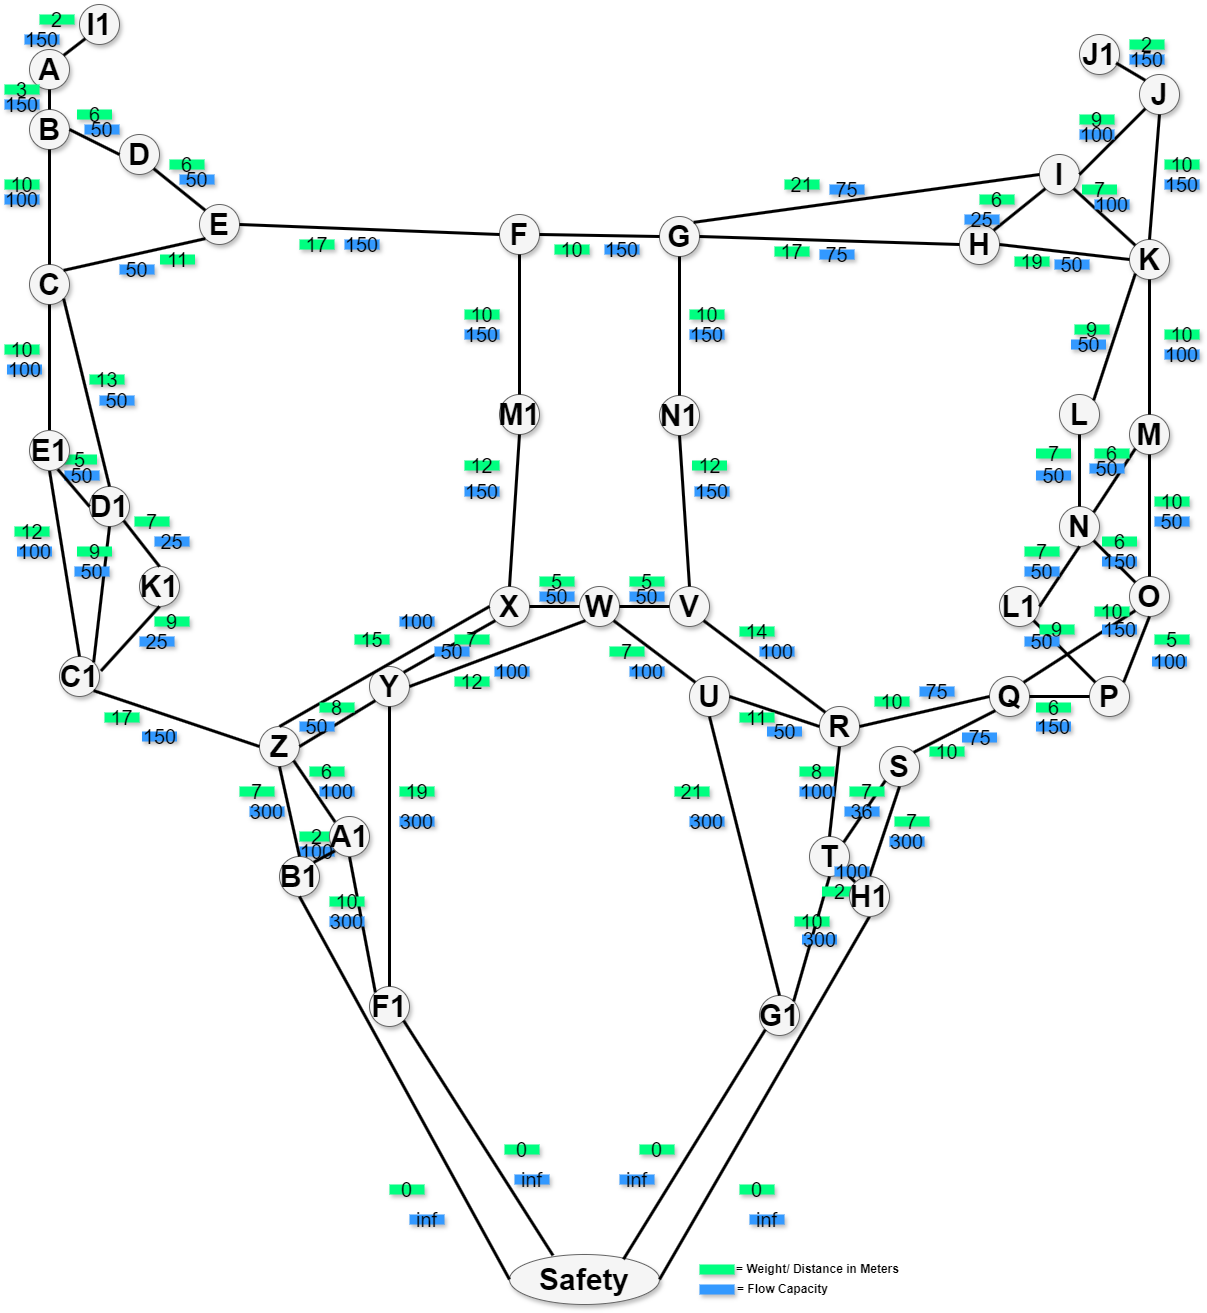

## Ground Floor

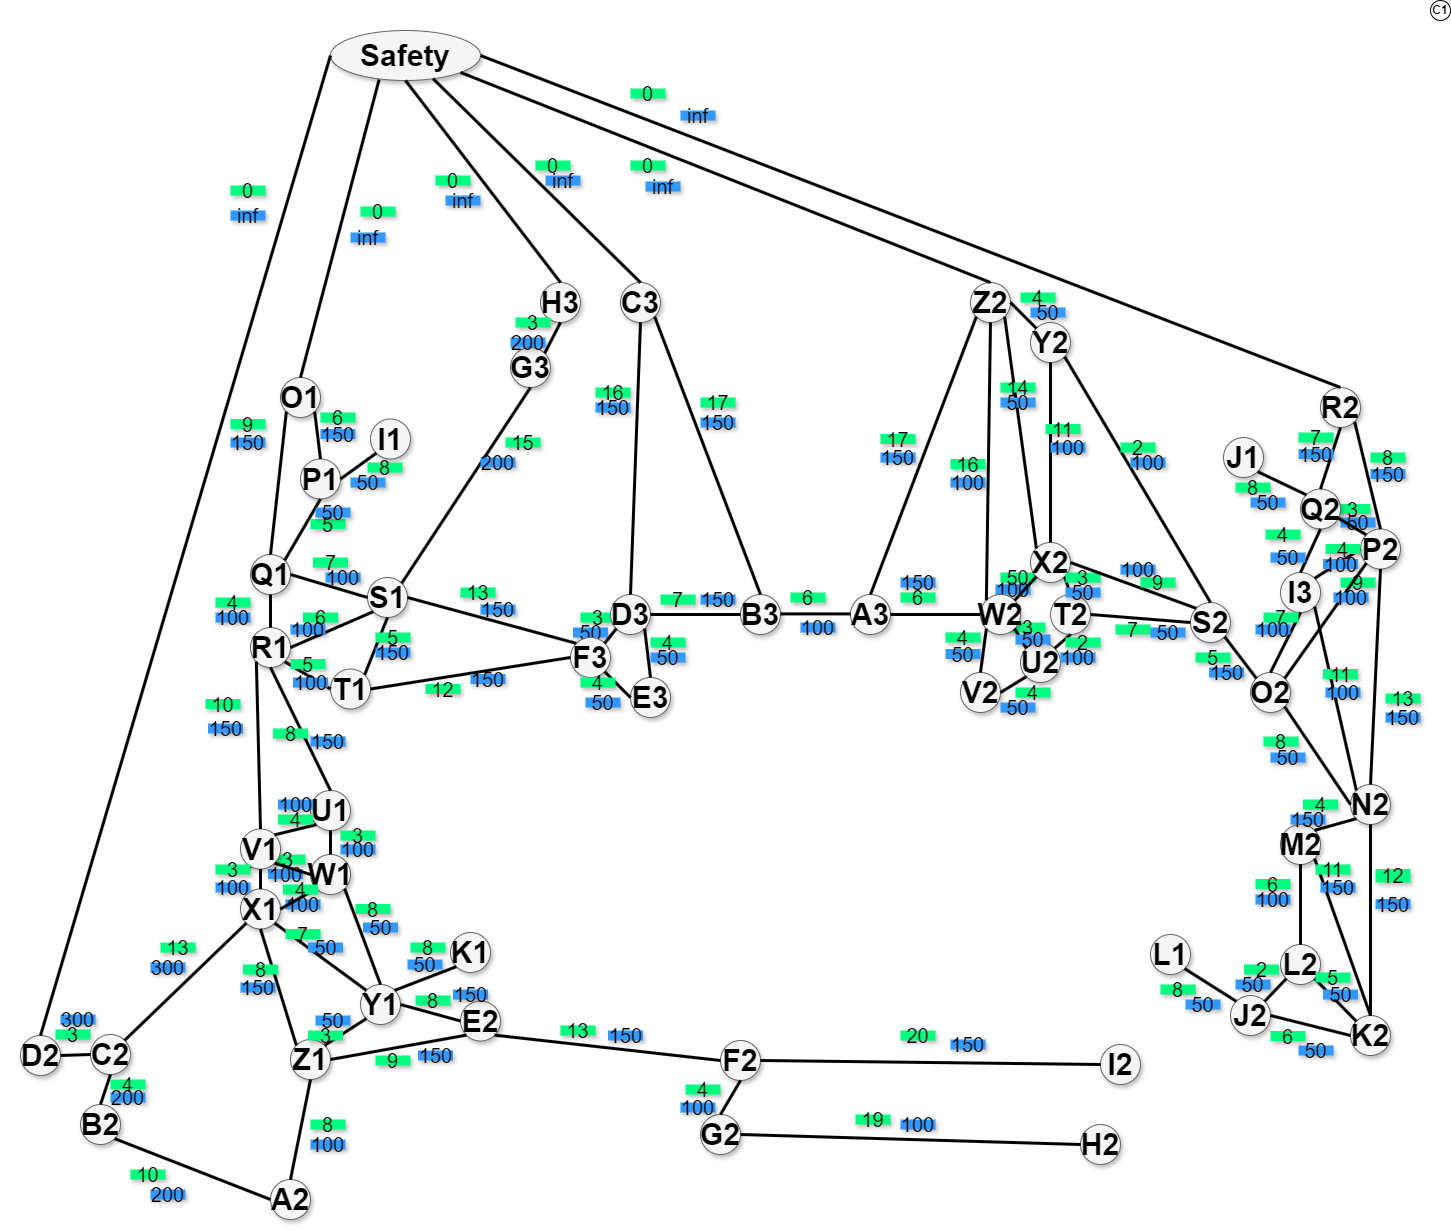

## Second Floor

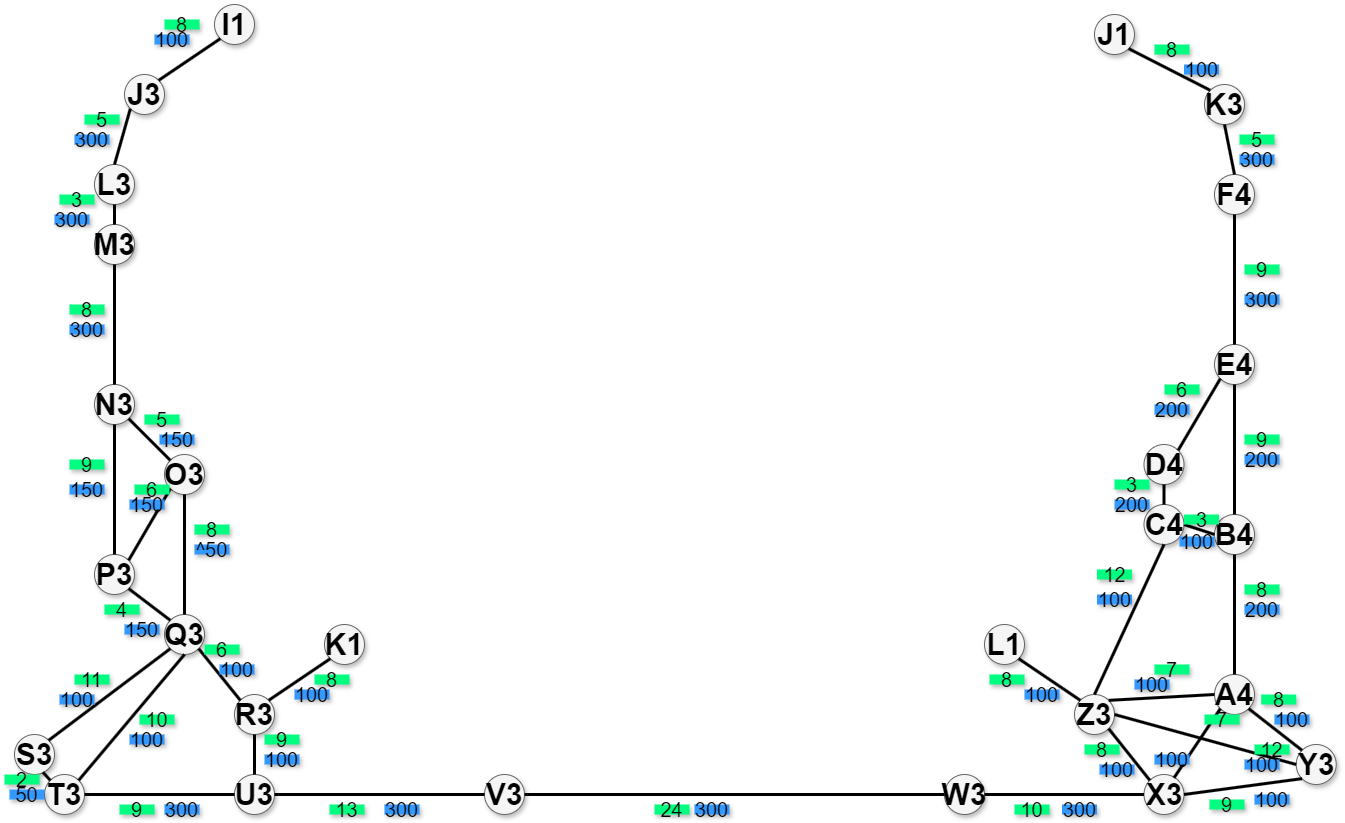

# Simulation 1

In [2]:

class Vertex:                     
    def __init__(self, name):       
        self.name = name

    def __eq__(self, V):
        return self.name == V.name

    def __repr__(self):
        return self.name

    def __hash__(self):             # hash method facilitates using instances of this class
        return hash(self.name)      # in collections such as dictionaries or sets 

    
class Edge:                       
    def __init__(self, v1, v2, w=1, capacity=sys.maxsize, status="safe"): 
        # default of weight is 1 meter, default of capacity is a maximum value that will not be reached and the default status of the edges is safe
        self.v1 = v1                
        self.v2 = v2               
        self.weight = w             
        self.capacity = capacity    
        self.status = status        
        self.real_weight = w      

    def __eq__(self, E):            # checks for equality between instances of the class, allowing to compare edges
        t1 = (self.v1 == E.v1) and (self.v2 == E.v2) and (self.weight == E.weight) and (self.capacity == E.capacity) and (self.status == E.status)
        return t1              

    def __repr__(self):
        return f"({self.v1},{self.v2},{self.weight},{self.capacity},{self.status})"
    

class Graph:                                      
    def __init__(self, graph, vertices, edges):  
        self.vertices = vertices                  
        self.edges = edges                        
        self.capacity = {v: {} for v in vertices} 
        self.weights = {v: {} for v in vertices} 

        for edge in edges:                                    # iterate over edges to initialize the capacity and weight matrices
            self.capacity[edge.v1][edge.v2] = edge.capacity   # use the capacity values of the edges
            self.weights[edge.v1][edge.v2] = edge.real_weight # and the real weight values between the vertices

def heuristic(e):   
    if e.status == "blocked":     
        return e.real_weight*100  
    if e.status == "safe":        
        return e.real_weight      
    else:                         
        return e.real_weight
        
def find_closest_unvisited(vertices, distances, visited):
    d = max(distances) + 1                    # define the highest distance plus one as a maximum as no greater distance can be achieved
    next_V = None                             # define a next vertex variable (default None)
    for idx in range(len(vertices)):          
        if distances[idx] < d:                # if the distance of a vertex is smaller than the max distance
            if vertices[idx] not in visited:  # as long as that vertex is not visited
                next_V = vertices[idx]        # have is be the next vertex to visit
                d = distances[idx]            # store the distance
    return next_V                             # that vertex is then the closest unvisited vertex, this is repeated until every vertex in the list has been visited


def Astar(G, s):
    inf = 1
    for e in G.edges:
        inf += e.weight

    dist = [inf] * len(G.vertices)  # define distances inf
    dist[G.vertices.index(s)] = 0   # but as 0 for starting point 

    prev = [None] * len(G.vertices) # all prev defined as None

    visited = []                    # no vertices visited yet
    v = find_closest_unvisited(G.vertices, dist, visited)

    while isinstance(v, Vertex):
        visited.append(v)           # visit the vertex and store it

        idx_1 = G.vertices.index(v)

        for e in G.edges:           # loop to check all neighbors
            e.weight = heuristic(e) # integrate heuristic function to use a recomputed weight if applicable
            if e.v1 == v:
                if e.v2 not in visited:        # if the neighbour is not visited
                    idx_2 = G.vertices.index(e.v2)
                    d = dist[idx_1] + e.weight # compute the new distance
                    if d < dist[idx_2]:        # check and update if there is a shorter path
                        dist[idx_2] = d
                        prev[idx_2] = v
            elif e.v2 == v:                    # same done, treating v as end point
                if e.v1 not in visited:
                    idx_2 = G.vertices.index(e.v1)
                    d = dist[idx_1] + e.weight
                    if d < dist[idx_2]:
                        dist[idx_2] = d
                        prev[idx_2] = v

        v = find_closest_unvisited(G.vertices, dist, visited) # find the next unvisited closest neighbor

    return dist, prev

def Dijkstra(G, s):
    inf = 1
    for e in G.edges:
        inf += e.weight

    dist = [inf] * len(G.vertices)
    dist[G.vertices.index(s)] = 0

    prev = [None] * len(G.vertices)

    visited = []
    v = find_closest_unvisited(G.vertices, dist, visited)

    while isinstance(v, Vertex):
        visited.append(v)

        idx_1 = G.vertices.index(v)

        for e in G.edges: 
            # heuristic method here not integrated, that is the only difference to previously
            if e.v1 == v:
                if e.v2 not in visited:
                    idx_2 = G.vertices.index(e.v2)
                    d = dist[idx_1] + e.weight
                    if d < dist[idx_2]:
                        dist[idx_2] = d
                        prev[idx_2] = v
            elif e.v2 == v:
                if e.v1 not in visited:
                    idx_2 = G.vertices.index(e.v1)
                    d = dist[idx_1] + e.weight
                    if d < dist[idx_2]:
                        dist[idx_2] = d
                        prev[idx_2] = v

        v = find_closest_unvisited(G.vertices, dist, visited)

    return dist, prev


def FordFulkerson(source, sink, graph, aug_method):
    max_flow = 0
    while True:
        dist, prev = aug_method(graph, source)
        path = path_computation(source, sink, graph, aug_method)

        if not path or path[-1] != sink:
            break  

        path_flow = float('Inf')
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            path_flow = min(path_flow, graph.capacity[u][v])

        if path_flow == 0:
            break 

        max_flow += path_flow

        
        for i in range(len(path) - 1):         # Update residual capacities
            u = path[i]
            v = path[i + 1]
            graph.capacity[u][v] -= path_flow  # the capacity from the direction that was followed will decrease by the value of the path flow
            graph.capacity[v][u] = graph.capacity.get(v, {}).get(u, 0) + path_flow # the reverse capacity will increase

    return max_flow

def path_computation(A, B, G, aug_method):
    dist, prev = aug_method(G, A)
    idx_A = G.vertices.index(A)
    idx_B = G.vertices.index(B)
    if isinstance(prev[idx_B], Vertex):
        p = [B]
        backtracked = False
        while not backtracked:
            p.append(prev[G.vertices.index(p[-1])])
            backtracked = p[-1] == A
        p.reverse()
        
        return p
    

def path_distance(A, B, G, aug_method):
    p = path_computation(A, B, G, aug_method)     # the path is computed with the previous function
    total_distance = 0                            # both distances initialized at 0
    potential_distance = 0
    for i in range(len(p) - 1):                   # loop over the vertices in the path
        u = p[i]
        v = p[i + 1]
        total_distance += G.weights[u][v]         # add the original weights to the total distance variable
        for e in G.edges:                   
            if (e.v1 == u and e.v2 == v) or (e.v1 == v and e.v2 == u):
                edge = e                          # check if the edge exists
                break
        if edge:
            potential_distance += heuristic(edge) # compute the potential distance with the influence of the statuses
    return total_distance, potential_distance

A = Vertex("A")
B = Vertex("B")
C = Vertex("C")
D = Vertex("D")
E = Vertex("E")
F = Vertex("F")
G = Vertex("G")
H = Vertex("H")
I = Vertex("I")
J = Vertex("J")
K = Vertex("K")
L = Vertex("L")
M = Vertex("M")
N = Vertex("N")
O = Vertex("O")
P = Vertex("P")
Q = Vertex("Q")
R = Vertex("R")
S = Vertex("S")
T = Vertex("T")
U = Vertex("U")
V = Vertex("V")
W = Vertex("W")
X = Vertex("X")
Y = Vertex("Y")
Z = Vertex("Z")
A1 = Vertex("A1")
B1 = Vertex("B1")
C1 = Vertex("C1")
D1 = Vertex("D1")
E1 = Vertex("E1")
F1 = Vertex("F1")
G1 = Vertex("G1")
H1 = Vertex("H1")
I1 = Vertex("I1")
J1 = Vertex("J1")
K1 = Vertex("K1")
L1 = Vertex("L1")
M1 = Vertex("M1")
N1 = Vertex("N1")
Safety = Vertex("Safety")
O1 = Vertex("O1")
P1 = Vertex("P1")
Q1 = Vertex("Q1")
R1 = Vertex("R1")
S1 = Vertex("S1")
T1 = Vertex("T1")
U1 = Vertex("U1")
V1 = Vertex("V1")
W1 = Vertex("W1")
X1 = Vertex("X1")
Y1 = Vertex("Y1")
Z1 = Vertex("Z1")
A2 = Vertex("A2")
B2 = Vertex("B2")
C2 = Vertex("C2")
D2 = Vertex("D2")
E2 = Vertex("E2")
F2 = Vertex("F2")
G2 = Vertex("G2")
H2 = Vertex("H2")
I2 = Vertex("I2")
J2 = Vertex("J2")
K2 = Vertex("K2")
L2 = Vertex("L2")
M2 = Vertex("M2")
N2 = Vertex("N2")
O2 = Vertex("O2")
P2 = Vertex("P2")
Q2 = Vertex("Q2")
R2 = Vertex("R2")
S2 = Vertex("S2")
T2 = Vertex("T2")
U2 = Vertex("U2")
V2 = Vertex("V2")
W2 = Vertex("W2")
X2 = Vertex("X2")
Y2 = Vertex("Y2")
Z2 = Vertex("Z2")
A3 = Vertex("A3")
B3 = Vertex("B3")
C3 = Vertex("C3")
D3 = Vertex("D3")
E3 = Vertex("E3")
F3 = Vertex("F3")
G3 = Vertex("G3")
H3 = Vertex("H3")
I3 = Vertex("I3")
J3 = Vertex("J3")
L3 = Vertex("L3")
M3 = Vertex("M3")
N3 = Vertex("N3")
O3 = Vertex("O3")
P3 = Vertex("P3")
Q3 = Vertex("Q3")
R3 = Vertex("R3")
S3 = Vertex("S3")
T3 = Vertex("T3")
U3 = Vertex("U3")
V3 = Vertex("V3")
W3 = Vertex("W3")
X3 = Vertex("X3")
Y3 = Vertex("Y3")
Z3 = Vertex("Z3")
A4 = Vertex("A4")
B4 = Vertex("B4")
C4 = Vertex("C4")
D4 = Vertex("D4")
E4 = Vertex("E4")
F4 = Vertex("F4")
K3 = Vertex("K3")

vertices = [A, B, C, D, E, F, G, 
            H, I, J, K, L, M, N, 
            O, P, Q, R, S, T, U, 
            V, W, X, Y, Z, A1, B1, 
            C1, D1, E1, F1, G1, H1, I1, 
            J1, K1, L1, M1, N1, Safety, O1, 
            P1, Q1, R1, S1, T1, U1, V1, 
            W1, X1, Y1, Z1, A2, B2, C2, 
            D2, E2, F2, G2, H2, I2, J2, 
            K2, L2, M2, N2, O2, P2, Q2, 
            R2, S2, T2, U2, V2, W2, X2,
            Y2, Z2, A3, B3, C3, D3, E3, 
            F3, G3, H3, I3, J3, L3, M3, 
            N3, O3, P3, Q3, R3, S3, T3, 
            U3, V3, W3, X3, Y3, Z3, A4, 
            B4, C4, D4, E4, F4, K3
]


edges = [
    Edge(A, B, 3, 150), Edge(B, A, 3, 150), Edge(B, C, 10, 100), Edge(C, B, 10, 100), 
    Edge(B, D, 6, 50), Edge(D, B, 6, 50), Edge(C, E, 11, 50), Edge(E, C, 11, 50), 
    Edge(D, E, 6, 50), Edge(E, D, 6, 50), Edge(E, F, 17, 150), Edge(F, E, 17, 150), 
    Edge(F, G, 10, 150), Edge(G, F, 10, 150), Edge(G, H, 17, 75), Edge(H, G, 17, 75), 
    Edge(G, I, 21, 75), Edge(I, G, 21, 75), Edge(H, I, 6, 25), Edge(I, H, 6, 25),
    Edge(H, K, 10, 50), Edge(K, H, 10, 50), Edge(I, J, 9, 100), Edge(J, I, 9, 100), 
    Edge(I, K, 7, 100), Edge(K, I, 7, 100), Edge(J, K, 10, 150), Edge(K, J, 10, 150),
    Edge(K, L, 9, 50), Edge(L, K, 9, 50), Edge(K, M, 10, 100), Edge(M, K, 10, 100), 
    Edge(L, N, 7, 50), Edge(N, L, 7, 50), Edge(M, N, 6, 50), Edge(N, M, 6, 50), 
    Edge(M, O, 10, 50), Edge(O, M, 10, 50), Edge(N, O, 6, 150), Edge(O, N, 6, 150), 
    Edge(N, P, 9, 50), Edge(P, N, 9, 50), Edge(O, P, 5, 100), Edge(P, O, 5, 100), 
    Edge(O, Q, 10, 150), Edge(Q, O, 10, 150), Edge(P, Q, 6, 150), Edge(Q, P, 6, 150),
    Edge(Q, R, 10, 75), Edge(R, Q, 10, 75), Edge(Q, S, 10, 75), Edge(S, Q, 10, 75), 
    Edge(S, T, 7, 36), Edge(T, S, 7, 36), Edge(S, H1, 7, 300), Edge(H1, S, 7, 300), 
    Edge(T, H1, 2, 100), Edge(H1, T, 2, 100), Edge(T, G1, 10, 300), Edge(G1, T, 10, 300), 
    Edge(R, T, 8, 100), Edge(T, R, 8, 100), Edge(R, H1, 9, 300), Edge(H1, R, 9, 300), 
    Edge(R, U, 11, 50), Edge(U, R, 11, 50), Edge(R, V, 14, 100), Edge(V, R, 14, 100),
    Edge(U, V, 3, 50), Edge(V, U, 3, 50), Edge(U, W, 7, 100), Edge(W, U, 7, 100), 
    Edge(V, W, 5, 50), Edge(W, V, 5, 50), Edge(W, X, 5, 50), Edge(X, W, 5, 50), 
    Edge(W, Y, 12, 100), Edge(Y, W, 12, 100), Edge(X, Y, 7, 50), Edge(Y, X, 7, 50), 
    Edge(X, Z, 15, 100), Edge(Z, X, 15, 100), Edge(Y, Z, 8, 50), Edge(Z, Y, 8, 50), 
    Edge(Z, A1, 6, 100), Edge(A1, Z, 6, 100), Edge(Z, B1, 7, 300), Edge(B1, Z, 7, 300),
    Edge(A1, B1, 2, 100), Edge(B1, A1, 2, 100), Edge(A1, F1, 10, 300), Edge(F1, A1, 10, 300), 
    Edge(Z, C1, 17, 150), Edge(C1, Z, 17, 150), Edge(C1, D1, 9, 50), Edge(D1, C1, 9, 50), 
    Edge(C1, E1, 12, 100), Edge(E1, C1, 12, 100), Edge(E1, D1, 4, 50), Edge(D1, E1, 4, 50), 
    Edge(E1, C, 10, 100), Edge(C, E1, 10, 100), Edge(D1, C, 13, 50), Edge(C, D1, 13, 50), 
    Edge(A, I1, 2, 150), Edge(I1, A, 2, 150), Edge(F, M1, 10, 150, "blocked"), Edge(M1, F, 10, 150, "blocked"), 
    Edge(M1, X, 12, 150), Edge(X, M1, 12, 150), Edge(G, N1, 10, 150, "blocked"), Edge(N1, G, 10, 150, "blocked"),
    Edge(N1, V, 12, 150), Edge(V, N1, 12, 150), Edge(J, J1, 2, 150), Edge(J1, J, 2, 150), 
    Edge(N, L1, 7, 50), Edge(L1, N, 7, 50), Edge(L1, P, 9, 50), Edge(P, L1, 9, 50), 
    Edge(U, G1, 21, 300), Edge(G1, U, 21, 300), Edge(Y, F1, 19, 300), Edge(F1, Y, 19, 300), 
    Edge(C1, K1, 9, 25), Edge(K1, C1, 9, 25), Edge(K1, D1, 7, 25), Edge(D1, K1, 7, 25),
    # the following is the floorplan of the ground floor of the school building 
    Edge(O1, P1, 6, 150), Edge(P1, O1, 6, 150), Edge(O1, Q1, 9, 150), Edge(Q1, O1, 9, 150), 
    Edge(P1, Q1, 5, 50), Edge(Q1, P1, 5, 50), Edge(Q1, S1, 7, 100), Edge(S1, Q1, 7, 100), 
    Edge(Q1, R1, 4, 100), Edge(R1, Q1, 4, 100), Edge(R1, S1, 6, 100), Edge(S1, R1, 6, 100), 
    Edge(R1, T1, 5, 100), Edge(T1, R1, 5, 100), Edge(R1, U1, 8, 150), Edge(U1, R1, 8, 150), 
    Edge(S1, F3, 13, 150), Edge(F3, S1, 13, 150), Edge(S1, G3, 15, 200), Edge(G3, S1, 15, 200),
    Edge(G3, H3, 3, 200), Edge(H3, G3, 3, 200), Edge(T1, S1, 5, 150), Edge(S1, T1, 5, 150), 
    Edge(T1, F3, 12, 150), Edge(F3, T1, 12, 150), Edge(F3, E3, 4, 50), Edge(E3, F3, 4, 50),
    Edge(F3, D3, 3, 50), Edge(D3, F3, 3, 50), Edge(E3, D3, 4, 50), Edge(D3, E3, 4, 50), 
    Edge(D3, C3, 16, 150), Edge(C3, D3, 16, 150), Edge(D3, B3, 7, 150), Edge(B3, D3, 7, 150), 
    Edge(B3, C3, 17, 150), Edge(C3, B3, 17, 150), Edge(B3, A3, 6, 100), Edge(A3, B3, 6, 100), 
    Edge(R1, V1, 10, 150), Edge(V1, R1, 10, 150), Edge(U1, V1, 4, 100), Edge(V1, U1, 4, 100), 
    Edge(U1, W1, 3, 100), Edge(W1, U1, 3, 100), Edge(V1, W1, 3, 100), Edge(W1, V1, 3, 100),
    Edge(V1, W1, 3, 100), Edge(W1, V1, 3, 100), Edge(V1, X1, 3, 100), Edge(X1, V1, 3, 100), 
    Edge(W1, X1, 4, 100), Edge(X1, W1, 4, 100), Edge(W1, Y1, 8, 50), Edge(Y1, W1, 8, 50), 
    Edge(X1, Y1, 7, 50), Edge(Y1, X1, 7, 50), Edge(X1, C2, 13, 300), Edge(C2, X1, 13, 300), 
    Edge(X1, Z1, 8, 150), Edge(Z1, X1, 8, 150), Edge(C2, D2, 3, 300), Edge(D2, C2, 3, 300), 
    Edge(C2, B2, 4, 200), Edge(B2, C2, 4, 200), Edge(B2, A2, 10, 200), Edge(A2, B2, 10, 200),
    Edge(A2, Z1, 8, 100), Edge(Z1, A2, 8, 100), Edge(Z1, Y1, 3, 50), Edge(Y1, Z1, 3, 50), 
    Edge(Y1, E2, 8, 150), Edge(E2, Y1, 8, 150), Edge(Z1, E2, 9, 150), Edge(E2, Z1, 9, 150), 
    Edge(E2, F2, 13, 150), Edge(F2, E2, 13, 150), Edge(F2, I2, 20, 150), Edge(I2, F2, 20, 150), 
    Edge(F2, G2, 4, 100), Edge(G2, F2, 4, 100), Edge(G2, H2, 19, 100), Edge(H2, G2, 19, 100), 
    Edge(A3, Z2, 17, 150), Edge(Z2, A3, 17, 150), Edge(Z2, W2, 16, 100), Edge(W2, Z2, 16, 100),
    Edge(A3, W2, 6, 150), Edge(W2, A3, 6, 150), Edge(Z2, Y2, 4, 50), Edge(Y2, Z2, 4, 50), 
    Edge(Z2, X2, 14, 50), Edge(X2, Z2, 14, 50), Edge(W2, X2, 4, 50), Edge(X2, W2, 4, 50), 
    Edge(X2, Y2, 11, 100), Edge(Y2, X2, 11, 100), Edge(W2, V2, 4, 50), Edge(V2, W2, 4, 50), 
    Edge(W2, U2, 3, 50), Edge(U2, W2, 3, 50), Edge(V2, U2, 4, 50), Edge(U2, V2, 4, 50), 
    Edge(U2, T2, 2, 100), Edge(T2, U2, 2, 100), Edge(T2, X2, 3, 50), Edge(X2, T2, 3, 50), 
    Edge(T2, S2, 7, 50), Edge(S2, T2, 7, 50), Edge(X2, S2, 9, 100), Edge(S2, X2, 9, 100),
    Edge(Y2, S2, 16, 200), Edge(S2, Y2, 16, 200), Edge(S2, O2, 5, 150), Edge(O2, S2, 5, 150), 
    Edge(O2, I3, 7, 100), Edge(I3, O2, 7, 100), Edge(O2, P2, 9, 100), Edge(P2, O2, 9, 100), 
    Edge(O2, N2, 8, 50), Edge(N2, O2, 8, 50), Edge(I3, Q2, 4, 50), Edge(Q2, I3, 4, 50), 
    Edge(P2, Q2, 3, 50), Edge(Q2, P2, 3, 50), Edge(I3, P2, 4, 100), Edge(P2, I3, 4, 100), 
    Edge(Q2, R2, 7, 150), Edge(R2, Q2, 7, 150), Edge(P2, R2, 8, 150), Edge(R2, P2, 8, 150), 
    Edge(I3, N2, 11, 100), Edge(N2, I3, 11, 100), Edge(P2, N2, 13, 150), Edge(N2, P2, 13, 150), 
    Edge(N2, M2, 4, 150), Edge(M2, N2, 4, 150), Edge(N2, K2, 12, 150), Edge(K2, N2, 12, 150), 
    Edge(M2, K2, 11, 100), Edge(K2, M2, 11, 100), Edge(M2, L2, 6, 100), Edge(L2, M2, 6, 100), 
    Edge(L2, K2, 5, 50), Edge(K2, L2, 5, 50), Edge(L2, J2, 2, 50), Edge(J2, L2, 2, 50), 
    Edge(K2, J2, 6, 50), Edge(J2, K2, 6, 50), Edge(Y1, K1, 8, 50), Edge(K1, Y1, 8, 50), 
    Edge(J2, L1, 8, 50), Edge(L1, J2, 8, 50), Edge(P1, I1, 8, 50), Edge(I1, P1, 8, 50), 
    Edge(Q2, J1, 8, 50), Edge(J1, Q2, 8, 50),
    # the following is the floorplan of the second floor of the school building 
    Edge(I1, J3, 8, 100), Edge(J3, I1, 8, 100), Edge(J3, L3, 5, 300), Edge(L3, J3, 5, 300), 
    Edge(L3, M3, 3, 300), Edge(M3, L3, 3, 300), Edge(M3, N3, 8, 300), Edge(N3, M3, 8, 300), 
    Edge(N3, O3, 5, 150), Edge(O3, N3, 5, 150), Edge(N3, P3, 9, 150), Edge(P3, N3, 9, 150), 
    Edge(O3, P3, 6, 150), Edge(P3, O3, 6, 150), Edge(P3, Q3, 4, 150), Edge(Q3, P3, 4, 150), 
    Edge(Q3, R3, 6, 100), Edge(R3, Q3, 6, 100), Edge(Q3, S3, 11, 100), Edge(S3, Q3, 11, 100), 
    Edge(Q3, T3, 10, 100), Edge(T3, Q3, 10, 100), Edge(R3, K1, 8, 100), Edge(K1, R3, 8, 100), 
    Edge(S3, T3, 2, 50), Edge(T3, S3, 2, 50), Edge(T3, U3, 9, 300), Edge(U3, T3, 9, 300), 
    Edge(U3, R3, 9, 100), Edge(R3, U3, 9, 100), Edge(U3, V3, 13, 300), Edge(V3, U3, 13, 300), 
    Edge(V3, W3, 24, 300), Edge(W3, V3, 24, 300), Edge(W3, X3, 10, 300), Edge(X3, W3, 10, 300), 
    Edge(X3, Y3, 9, 100), Edge(Y3, X3, 9, 100), Edge(X3, Z3, 8, 100), Edge(Z3, X3, 8, 100), 
    Edge(X3, A4, 7, 100), Edge(A4, X3, 7, 100), Edge(Y3, A4, 8, 100), Edge(A4, Y3, 8, 100), 
    Edge(Y3, Z3, 12, 100), Edge(Z3, Y3, 12, 100), Edge(A4, Z3, 7, 100), Edge(Z3, A4, 7, 100), 
    Edge(A4, B4, 8, 200), Edge(B4, A4, 8, 200), Edge(Z3, L1, 8, 100), Edge(L1, Z3, 8, 100), 
    Edge(Z3, C4, 12, 100), Edge(C4, Z3, 12, 100), Edge(B4, C4, 3, 100), Edge(C4, B4, 3, 100), 
    Edge(B4, E4, 9, 200), Edge(E4, B4, 9, 200), Edge(C4, D4, 3, 200), Edge(D4, C4, 3, 200), 
    Edge(D4, E4, 6, 200), Edge(E4, D4, 6, 200), Edge(E4, F4, 9, 300), Edge(F4, E4, 9, 300), 
    Edge(F4, K3, 5, 300), Edge(K3, F4, 5, 300), Edge(K3, J1, 8, 100), Edge(J1, K3, 8, 100), 
    Edge(O3, Q3, 8, 150), Edge(Q3, O3, 8, 150)
]


safety_edges = [(Edge(Safety,B1,0, sys.maxsize)), (Edge(B1,Safety,0, sys.maxsize)), # first floor exits
                (Edge(Safety,F1,0, sys.maxsize)), (Edge(F1,Safety,0, sys.maxsize)),
                (Edge(Safety,G1,0, sys.maxsize)), (Edge(G1,Safety,0, sys.maxsize)), 
                (Edge(Safety,H1,0, sys.maxsize)), (Edge(H1,Safety,0, sys.maxsize)),
                (Edge(Safety,D2,0, sys.maxsize)), (Edge(D2,Safety,0, sys.maxsize)),  # ground floor exits
                (Edge(Safety,O1,0, sys.maxsize)), (Edge(O1,Safety,0, sys.maxsize)), 
                (Edge(Safety,H3,0, sys.maxsize)), (Edge(H3,Safety,0, sys.maxsize)), 
                (Edge(Safety,C3,0, sys.maxsize)), (Edge(C3,Safety,0, sys.maxsize)),
                (Edge(Safety,Z2,0, sys.maxsize)), (Edge(Z2,Safety,0, sys.maxsize)), 
                (Edge(Safety,R2,0, sys.maxsize)), (Edge(R2,Safety,0, sys.maxsize))
]              

for safe_edge in safety_edges:
    edges.append(safe_edge)

def update_status(v1, v2, status):
    if v1 and v2:
        for edge in edges:
            if v1 == edge.v1 and v2 == edge.v2: # It needs to change the status from e.g. A -> B
                edge.status = status
            if v2 == edge.v1 and v1 == edge.v2: # and from B -> A as it is not possible for the status to only change in one direction
                edge.status = status


def check_path_validity(v1, v2, path):
    for i in range(len(path) - 1):        # Iterate over the consecutive pairs of vertices in path
        v1, v2 = path[i], path[i + 1]     # find edges
        for edge in edges:                # iterate over the edges in the path
            if (edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1):
                if edge.status != "safe": # if any edge is not safe
                    return False          # return false
    return True


def recalculate_path(source, sink, g, aug, path):
    for i in range(len(path) - 1):
        v1, v2 = path[i], path[i + 1]
        for edge in edges:
            if (edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1):
                if edge.status != "safe":
                    new_source = path[i]
                    new_path = path_computation(new_source, sink, g, aug)
                    path = path[:i] + new_path
                    break
    return path


def test(source, sink, aug):
    matrix = [[0] * len(vertices) for _ in range(len(vertices))]
    g = Graph(matrix, vertices, edges)
    path = path_computation(source, sink, g, aug)
    actual_dist, pot_dist = path_distance(source, sink, g, aug)
    print(f"The maximum possible flow from {source} to {sink} is {FordFulkerson(source, sink, g, aug)}, the path is: {path}")
    print(f"The distance of the path is {actual_dist} m , with the potential cost of {pot_dist}, taking into account the risk factors.")
    return source, sink, path, aug, actual_dist, pot_dist
    
    
def test_cascade(source, sink, path, aug, v1, v2, status, act_dist, pot_dist_og):
    matrix = [[0] * len(vertices) for _ in range(len(vertices))]
    g = Graph(matrix, vertices, edges)
    print(f"The initial path from {source} to {sink} is: {path}")
    print(f"The initial distance of the path is {act_dist} m, with the potential cost of {pot_dist_og}, taking into account the risk factors.")
    
    update_status(v1, v2, status)
    
    if not check_path_validity(v1, v2, path):
        path = recalculate_path(source, sink, g, aug, path)
        actual_dist, pot_dist = path_distance(source, sink, g, aug)
        print(f"After updating status of edge ({v1}, {v2}) to {status}, the new path is: {path}")
        print(f"The distance of the new path is {actual_dist} m, with the potential cost of {pot_dist}, taking into account the risk factors.")
    else:
        print(f"The path remains valid after updating status of edge ({v1}, {v2}) to {status}.")

dijkstra = test(D1, Safety, Dijkstra)   
astar = test(D1, Safety, Astar)         


source, sink, path, aug, actual_dist1, pot_dist1 = astar 
source1, sink1, path1, aug1, actual_dist2, pot_dist2 = dijkstra

block_c1_d = test_cascade(source1, sink1,  path1, aug1, D1, C1, "blocked", actual_dist2, pot_dist2)

block_c1 = test_cascade(source, sink,  path, aug, D1, C1, "blocked", actual_dist1, pot_dist1)

block_k1 = test_cascade(source, sink,  path, aug, D1, K1, "blocked", actual_dist1, pot_dist1)

block_e1 = test_cascade(source, sink,  path, aug, D1, E1, "blocked", actual_dist1, pot_dist1)

block_c = test_cascade(source, sink,  path, aug, D1, C, "blocked", actual_dist1, pot_dist1)


The maximum possible flow from D1 to Safety is 50, the path is: [D1, C1, Z, B1, Safety]
The distance of the path is 33 m , with the potential cost of 33, taking into account the risk factors.
The maximum possible flow from D1 to Safety is 50, the path is: [D1, C1, Z, B1, Safety]
The distance of the path is 33 m , with the potential cost of 33, taking into account the risk factors.
The initial path from D1 to Safety is: [D1, C1, Z, B1, Safety]
The initial distance of the path is 33 m, with the potential cost of 33, taking into account the risk factors.
After updating status of edge (D1, C1) to blocked, the new path is: [D1, C1, Z, B1, Safety]
The distance of the new path is 33 m, with the potential cost of 924, taking into account the risk factors.
The initial path from D1 to Safety is: [D1, C1, Z, B1, Safety]
The initial distance of the path is 33 m, with the potential cost of 33, taking into account the risk factors.
After updating status of edge (D1, C1) to blocked, the new path is: 

# Simulation 2

In [3]:
class Graph:
    def __init__(self, graph, vertices, edges):
        self.vertices = vertices
        self.edges = edges
        self.vertex_index = {self.vertices[i]: i for i in range(len(vertices))}
        self.index_vertex = {i: self.vertices[i] for i in range(len(vertices))}
        self.capacity = {v: {} for v in vertices}
        self.weights = {v: {} for v in vertices}
        self.ROW = len(graph)

        for edge in edges:
            self.capacity[edge.v1][edge.v2] = edge.capacity
            self.weights[edge.v1][edge.v2] = edge.weight
    
def heuristic(e):
    if e.status == "blocked":
        return e.real_weight*100
    if e.status == "safe":
        return e.real_weight
    else:
        return e.real_weight


def astar(source, sink, graph):
    source_index = graph.vertex_index[source]

    dist = [float('inf')] * graph.ROW
    prev = [None] * graph.ROW
    dist[source_index] = 0              # distance from source to itself is 0

    pq = [(0, source_index)]            # priority queue
    visited = []

    while pq:
        current_dist, u_idx = heapq.heappop(pq)
        if u_idx in visited:
            continue
        visited.append(u_idx)

        u = graph.index_vertex[u_idx]
        for v, capacity in graph.capacity[u].items():
            v_idx = graph.vertex_index[v]
            edge = next((e for e in graph.edges if e.v1 == u and e.v2 == v), None)
            if edge:
                weight = heuristic(edge)
            else:
                weight = float('inf')

            if dist[u_idx] + weight < dist[v_idx] and capacity > 0:
                dist[v_idx] = dist[u_idx] + weight
                prev[v_idx] = u_idx
                heapq.heappush(pq, (dist[v_idx], v_idx))

    return dist, prev

def dijkstra(source, sink, graph):
    source_index = graph.vertex_index[source]

    dist = [float('inf')] * graph.ROW
    prev = [None] * graph.ROW
    dist[source_index] = 0

    pq = [(0, source_index)]
    visited = []

    while pq:
        current_dist, u_idx = heapq.heappop(pq)
        if u_idx in visited:
            continue
        visited.append(u_idx)

        u = graph.index_vertex[u_idx]
        for v, capacity in graph.capacity[u].items():
            v_idx = graph.vertex_index[v]
            weight = graph.weights[u].get(v, float('inf')) # as explained, no heuristic function involved

            if dist[u_idx] + weight < dist[v_idx] and capacity > 0:
                dist[v_idx] = dist[u_idx] + weight
                prev[v_idx] = u_idx
                heapq.heappush(pq, (dist[v_idx], v_idx))

    return dist, prev

def FordFulkerson(graph, source, sink, aug_method, printed=True):
    max_flow = 0
    while True:
        dist, prev = aug_method(source, sink, graph)
        
        path = []
        v = graph.vertex_index[sink]
        while v is not None:
            path.append(graph.index_vertex[v])
            v = prev[v]
        path.reverse()
        path_names = [node for node in path]

        if not path or path[-1] != sink:
            break

        path_flow = float('Inf')
        path_dist = 0
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            path_flow = min(path_flow, graph.capacity[u][v])
            path_dist += graph.weights[u][v]
            
        if path[0] != sink and printed == True:
            print(path_names, path_flow, path_dist)
        else:
            break
            
        if path_flow == 0: # no capacity remains
            break 

        max_flow += path_flow

        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            graph.capacity[u][v] -= path_flow
            graph.capacity[v][u] = graph.capacity.get(v, {}).get(u, 0) + path_flow

    return max_flow

A = Vertex("A")
B = Vertex("B")
C = Vertex("C")
D = Vertex("D")
E = Vertex("E")
F = Vertex("F")
G = Vertex("G")
H = Vertex("H")
I = Vertex("I")
J = Vertex("J")
K = Vertex("K")
L = Vertex("L")
M = Vertex("M")
N = Vertex("N")
O = Vertex("O")
P = Vertex("P")
Q = Vertex("Q")
R = Vertex("R")
S = Vertex("S")
T = Vertex("T")
U = Vertex("U")
V = Vertex("V")
W = Vertex("W")
X = Vertex("X")
Y = Vertex("Y")
Z = Vertex("Z")
A1 = Vertex("A1")
B1 = Vertex("B1")
C1 = Vertex("C1")
D1 = Vertex("D1")
E1 = Vertex("E1")
F1 = Vertex("F1")
G1 = Vertex("G1")
H1 = Vertex("H1")
I1 = Vertex("I1")
J1 = Vertex("J1")
K1 = Vertex("K1")
L1 = Vertex("L1")
M1 = Vertex("M1")
N1 = Vertex("N1")
Safety = Vertex("Safety")
O1 = Vertex("O1")
P1 = Vertex("P1")
Q1 = Vertex("Q1")
R1 = Vertex("R1")
S1 = Vertex("S1")
T1 = Vertex("T1")
U1 = Vertex("U1")
V1 = Vertex("V1")
W1 = Vertex("W1")
X1 = Vertex("X1")
Y1 = Vertex("Y1")
Z1 = Vertex("Z1")
A2 = Vertex("A2")
B2 = Vertex("B2")
C2 = Vertex("C2")
D2 = Vertex("D2")
E2 = Vertex("E2")
F2 = Vertex("F2")
G2 = Vertex("G2")
H2 = Vertex("H2")
I2 = Vertex("I2")
J2 = Vertex("J2")
K2 = Vertex("K2")
L2 = Vertex("L2")
M2 = Vertex("M2")
N2 = Vertex("N2")
O2 = Vertex("O2")
P2 = Vertex("P2")
Q2 = Vertex("Q2")
R2 = Vertex("R2")
S2 = Vertex("S2")
T2 = Vertex("T2")
U2 = Vertex("U2")
V2 = Vertex("V2")
W2 = Vertex("W2")
X2 = Vertex("X2")
Y2 = Vertex("Y2")
Z2 = Vertex("Z2")
A3 = Vertex("A3")
B3 = Vertex("B3")
C3 = Vertex("C3")
D3 = Vertex("D3")
E3 = Vertex("E3")
F3 = Vertex("F3")
G3 = Vertex("G3")
H3 = Vertex("H3")
I3 = Vertex("I3")
J3 = Vertex("J3")
L3 = Vertex("L3")
M3 = Vertex("M3")
N3 = Vertex("N3")
O3 = Vertex("O3")
P3 = Vertex("P3")
Q3 = Vertex("Q3")
R3 = Vertex("R3")
S3 = Vertex("S3")
T3 = Vertex("T3")
U3 = Vertex("U3")
V3 = Vertex("V3")
W3 = Vertex("W3")
X3 = Vertex("X3")
Y3 = Vertex("Y3")
Z3 = Vertex("Z3")
A4 = Vertex("A4")
B4 = Vertex("B4")
C4 = Vertex("C4")
D4 = Vertex("D4")
E4 = Vertex("E4")
F4 = Vertex("F4")
K3 = Vertex("K3")
Source = Vertex("Source")

vertices = [A, B, C, D, E, F, G, 
            H, I, J, K, L, M, N, 
            O, P, Q, R, S, T, U,
            V, W, X, Y, Z, A1, B1, 
            C1, D1, E1, F1, G1, H1, I1, 
            J1, K1, L1, M1, N1, Safety, Source, 
            O1, P1, Q1, R1, S1, T1, U1, 
            V1, W1, X1, Y1, Z1, A2, B2, 
            C2, D2, E2, F2, G2, H2, I2, 
            J2, K2, L2, M2, N2, O2, P2, 
            Q2, R2, S2, T2, U2, V2, W2, 
            X2, Y2, Z2, A3, B3, C3, D3, 
            E3, F3, G3, H3, I3, J3, L3, 
            M3, N3, O3, P3, Q3, R3, S3, 
            T3, U3, V3, W3, X3, Y3, Z3, 
            A4, B4, C4, D4, E4, F4, K3
]


edges = [
    Edge(A, B, 3, 150), Edge(B, A, 3, 150), Edge(B, C, 10, 100), Edge(C, B, 10, 100), 
    Edge(B, D, 6, 50), Edge(D, B, 6, 50), Edge(C, E, 11, 50), Edge(E, C, 11, 50), 
    Edge(D, E, 6, 50), Edge(E, D, 6, 50), Edge(E, F, 17, 150), Edge(F, E, 17, 150), 
    Edge(F, G, 10, 150), Edge(G, F, 10, 150), Edge(G, H, 17, 75), Edge(H, G, 17, 75), 
    Edge(G, I, 21, 75), Edge(I, G, 21, 75), Edge(H, I, 6, 25), Edge(I, H, 6, 25),
    Edge(H, K, 10, 50), Edge(K, H, 10, 50), Edge(I, J, 9, 100), Edge(J, I, 9, 100), 
    Edge(I, K, 7, 100), Edge(K, I, 7, 100), Edge(J, K, 10, 150), Edge(K, J, 10, 150),
    Edge(K, L, 9, 50), Edge(L, K, 9, 50), Edge(K, M, 10, 100), Edge(M, K, 10, 100), 
    Edge(L, N, 7, 50), Edge(N, L, 7, 50), Edge(M, N, 6, 50), Edge(N, M, 6, 50), 
    Edge(M, O, 10, 50), Edge(O, M, 10, 50), Edge(N, O, 6, 150), Edge(O, N, 6, 150), 
    Edge(N, P, 9, 50), Edge(P, N, 9, 50), Edge(O, P, 5, 100), Edge(P, O, 5, 100), 
    Edge(O, Q, 10, 150), Edge(Q, O, 10, 150), Edge(P, Q, 6, 150), Edge(Q, P, 6, 150),
    Edge(Q, R, 10, 75), Edge(R, Q, 10, 75), Edge(Q, S, 10, 75), Edge(S, Q, 10, 75), 
    Edge(S, T, 7, 36), Edge(T, S, 7, 36), Edge(S, H1, 7, 300), Edge(H1, S, 7, 300), 
    Edge(T, H1, 2, 100), Edge(H1, T, 2, 100), Edge(T, G1, 10, 300), Edge(G1, T, 10, 300), 
    Edge(R, T, 8, 100), Edge(T, R, 8, 100), Edge(R, H1, 9, 300), Edge(H1, R, 9, 300), 
    Edge(R, U, 11, 50), Edge(U, R, 11, 50), Edge(R, V, 14, 100), Edge(V, R, 14, 100),
    Edge(U, V, 3, 50), Edge(V, U, 3, 50), Edge(U, W, 7, 100), Edge(W, U, 7, 100), 
    Edge(V, W, 5, 50), Edge(W, V, 5, 50), Edge(W, X, 5, 50), Edge(X, W, 5, 50), 
    Edge(W, Y, 12, 100), Edge(Y, W, 12, 100), Edge(X, Y, 7, 50), Edge(Y, X, 7, 50), 
    Edge(X, Z, 15, 100), Edge(Z, X, 15, 100), Edge(Y, Z, 8, 50), Edge(Z, Y, 8, 50), 
    Edge(Z, A1, 6, 100), Edge(A1, Z, 6, 100), Edge(Z, B1, 7, 300, "blocked"), Edge(B1, Z, 7, 300, "blocked"),
    Edge(A1, B1, 2, 100), Edge(B1, A1, 2, 100), Edge(A1, F1, 10, 300), Edge(F1, A1, 10, 300), 
    Edge(Z, C1, 17, 150), Edge(C1, Z, 17, 150), Edge(C1, D1, 9, 50), Edge(D1, C1, 9, 50), 
    Edge(C1, E1, 12, 100), Edge(E1, C1, 12, 100), Edge(E1, D1, 4, 50), Edge(D1, E1, 4, 50), 
    Edge(E1, C, 10, 100), Edge(C, E1, 10, 100), Edge(D1, C, 13, 50), Edge(C, D1, 13, 50), 
    Edge(A, I1, 2, 150), Edge(I1, A, 2, 150), Edge(F, M1, 10, 150, "blocked"), Edge(M1, F, 10, 150, "blocked"), 
    Edge(M1, X, 12, 150), Edge(X, M1, 12, 150), Edge(G, N1, 10, 150, "blocked"), Edge(N1, G, 10, 150, "blocked"),
    Edge(N1, V, 12, 150), Edge(V, N1, 12, 150), Edge(J, J1, 2, 150), Edge(J1, J, 2, 150), 
    Edge(N, L1, 7, 50), Edge(L1, N, 7, 50), Edge(L1, P, 9, 50), Edge(P, L1, 9, 50), 
    Edge(U, G1, 21, 300), Edge(G1, U, 21, 300), Edge(Y, F1, 19, 300), Edge(F1, Y, 19, 300), 
    Edge(C1, K1, 9, 25), Edge(K1, C1, 9, 25), Edge(K1, D1, 7, 25), Edge(D1, K1, 7, 25),
    # the following is the floorplan of the ground floor of the school building 
    Edge(O1, P1, 6, 150), Edge(P1, O1, 6, 150), Edge(O1, Q1, 9, 150), Edge(Q1, O1, 9, 150), 
    Edge(P1, Q1, 5, 50), Edge(Q1, P1, 5, 50), Edge(Q1, S1, 7, 100), Edge(S1, Q1, 7, 100), 
    Edge(Q1, R1, 4, 100), Edge(R1, Q1, 4, 100), Edge(R1, S1, 6, 100), Edge(S1, R1, 6, 100), 
    Edge(R1, T1, 5, 100), Edge(T1, R1, 5, 100), Edge(R1, U1, 8, 150), Edge(U1, R1, 8, 150), 
    Edge(S1, F3, 13, 150), Edge(F3, S1, 13, 150), Edge(S1, G3, 15, 200), Edge(G3, S1, 15, 200),
    Edge(G3, H3, 3, 200), Edge(H3, G3, 3, 200), Edge(T1, S1, 5, 150), Edge(S1, T1, 5, 150), 
    Edge(T1, F3, 12, 150), Edge(F3, T1, 12, 150), Edge(F3, E3, 4, 50), Edge(E3, F3, 4, 50),
    Edge(F3, D3, 3, 50), Edge(D3, F3, 3, 50), Edge(E3, D3, 4, 50), Edge(D3, E3, 4, 50), 
    Edge(D3, C3, 16, 150), Edge(C3, D3, 16, 150), Edge(D3, B3, 7, 150), Edge(B3, D3, 7, 150), 
    Edge(B3, C3, 17, 150), Edge(C3, B3, 17, 150), Edge(B3, A3, 6, 100), Edge(A3, B3, 6, 100), 
    Edge(R1, V1, 10, 150), Edge(V1, R1, 10, 150), Edge(U1, V1, 4, 100), Edge(V1, U1, 4, 100), 
    Edge(U1, W1, 3, 100), Edge(W1, U1, 3, 100), Edge(V1, W1, 3, 100), Edge(W1, V1, 3, 100),
    Edge(V1, W1, 3, 100), Edge(W1, V1, 3, 100), Edge(V1, X1, 3, 100), Edge(X1, V1, 3, 100), 
    Edge(W1, X1, 4, 100), Edge(X1, W1, 4, 100), Edge(W1, Y1, 8, 50), Edge(Y1, W1, 8, 50), 
    Edge(X1, Y1, 7, 50), Edge(Y1, X1, 7, 50), Edge(X1, C2, 13, 300), Edge(C2, X1, 13, 300), 
    Edge(X1, Z1, 8, 150), Edge(Z1, X1, 8, 150), Edge(C2, D2, 3, 300), Edge(D2, C2, 3, 300), 
    Edge(C2, B2, 4, 200), Edge(B2, C2, 4, 200), Edge(B2, A2, 10, 200), Edge(A2, B2, 10, 200),
    Edge(A2, Z1, 8, 100), Edge(Z1, A2, 8, 100), Edge(Z1, Y1, 3, 50), Edge(Y1, Z1, 3, 50), 
    Edge(Y1, E2, 8, 150), Edge(E2, Y1, 8, 150), Edge(Z1, E2, 9, 150), Edge(E2, Z1, 9, 150), 
    Edge(E2, F2, 13, 150), Edge(F2, E2, 13, 150), Edge(F2, I2, 20, 150), Edge(I2, F2, 20, 150), 
    Edge(F2, G2, 4, 100), Edge(G2, F2, 4, 100), Edge(G2, H2, 19, 100), Edge(H2, G2, 19, 100), 
    Edge(A3, Z2, 17, 150), Edge(Z2, A3, 17, 150), Edge(Z2, W2, 16, 100), Edge(W2, Z2, 16, 100),
    Edge(A3, W2, 6, 150), Edge(W2, A3, 6, 150), Edge(Z2, Y2, 4, 50), Edge(Y2, Z2, 4, 50), 
    Edge(Z2, X2, 14, 50), Edge(X2, Z2, 14, 50), Edge(W2, X2, 4, 50), Edge(X2, W2, 4, 50), 
    Edge(X2, Y2, 11, 100), Edge(Y2, X2, 11, 100), Edge(W2, V2, 4, 50), Edge(V2, W2, 4, 50), 
    Edge(W2, U2, 3, 50), Edge(U2, W2, 3, 50), Edge(V2, U2, 4, 50), Edge(U2, V2, 4, 50), 
    Edge(U2, T2, 2, 100), Edge(T2, U2, 2, 100), Edge(T2, X2, 3, 50), Edge(X2, T2, 3, 50), 
    Edge(T2, S2, 7, 50), Edge(S2, T2, 7, 50), Edge(X2, S2, 9, 100), Edge(S2, X2, 9, 100),
    Edge(Y2, S2, 16, 200), Edge(S2, Y2, 16, 200), Edge(S2, O2, 5, 150), Edge(O2, S2, 5, 150), 
    Edge(O2, I3, 7, 100), Edge(I3, O2, 7, 100), Edge(O2, P2, 9, 100), Edge(P2, O2, 9, 100), 
    Edge(O2, N2, 8, 50), Edge(N2, O2, 8, 50), Edge(I3, Q2, 4, 50), Edge(Q2, I3, 4, 50), 
    Edge(P2, Q2, 3, 50), Edge(Q2, P2, 3, 50), Edge(I3, P2, 4, 100), Edge(P2, I3, 4, 100), 
    Edge(Q2, R2, 7, 150), Edge(R2, Q2, 7, 150), Edge(P2, R2, 8, 150), Edge(R2, P2, 8, 150), 
    Edge(I3, N2, 11, 100), Edge(N2, I3, 11, 100), Edge(P2, N2, 13, 150), Edge(N2, P2, 13, 150), 
    Edge(N2, M2, 4, 150), Edge(M2, N2, 4, 150), Edge(N2, K2, 12, 150), Edge(K2, N2, 12, 150), 
    Edge(M2, K2, 11, 100), Edge(K2, M2, 11, 100), Edge(M2, L2, 6, 100), Edge(L2, M2, 6, 100),
    Edge(L2, K2, 5, 50), Edge(K2, L2, 5, 50), Edge(L2, J2, 2, 50), Edge(J2, L2, 2, 50), 
    Edge(K2, J2, 6, 50), Edge(J2, K2, 6, 50), Edge(Y1, K1, 8, 50), Edge(K1, Y1, 8, 50), 
    Edge(J2, L1, 8, 50), Edge(L1, J2, 8, 50), Edge(P1, I1, 8, 50), Edge(I1, P1, 8, 50), 
    Edge(Q2, J1, 8, 50), Edge(J1, Q2, 8, 50),
    # the following is the floorplan of the second floor of the school building 
    Edge(I1, J3, 8, 100), Edge(J3, I1, 8, 100), Edge(J3, L3, 5, 300), Edge(L3, J3, 5, 300), 
    Edge(L3, M3, 3, 300), Edge(M3, L3, 3, 300), Edge(M3, N3, 8, 300), Edge(N3, M3, 8, 300), 
    Edge(N3, O3, 5, 150), Edge(O3, N3, 5, 150), Edge(N3, P3, 9, 150), Edge(P3, N3, 9, 150), 
    Edge(O3, P3, 6, 150), Edge(P3, O3, 6, 150), Edge(P3, Q3, 4, 150), Edge(Q3, P3, 4, 150), 
    Edge(Q3, R3, 6, 100), Edge(R3, Q3, 6, 100), Edge(Q3, S3, 11, 100), Edge(S3, Q3, 11, 100), 
    Edge(Q3, T3, 10, 100), Edge(T3, Q3, 10, 100), Edge(R3, K1, 8, 100), Edge(K1, R3, 8, 100), 
    Edge(S3, T3, 2, 50), Edge(T3, S3, 2, 50), Edge(T3, U3, 9, 300), Edge(U3, T3, 9, 300), 
    Edge(U3, R3, 9, 100), Edge(R3, U3, 9, 100), Edge(U3, V3, 13, 300), Edge(V3, U3, 13, 300), 
    Edge(V3, W3, 24, 300), Edge(W3, V3, 24, 300), Edge(W3, X3, 10, 300), Edge(X3, W3, 10, 300), 
    Edge(X3, Y3, 9, 100), Edge(Y3, X3, 9, 100), Edge(X3, Z3, 8, 100), Edge(Z3, X3, 8, 100), 
    Edge(X3, A4, 7, 100), Edge(A4, X3, 7, 100), Edge(Y3, A4, 8, 100), Edge(A4, Y3, 8, 100), 
    Edge(Y3, Z3, 12, 100), Edge(Z3, Y3, 12, 100), Edge(A4, Z3, 7, 100), Edge(Z3, A4, 7, 100), 
    Edge(A4, B4, 8, 200), Edge(B4, A4, 8, 200), Edge(Z3, L1, 8, 100), Edge(L1, Z3, 8, 100), 
    Edge(Z3, C4, 12, 100), Edge(C4, Z3, 12, 100), Edge(B4, C4, 3, 100), Edge(C4, B4, 3, 100), 
    Edge(B4, E4, 9, 200), Edge(E4, B4, 9, 200), Edge(C4, D4, 3, 200), Edge(D4, C4, 3, 200), 
    Edge(D4, E4, 6, 200), Edge(E4, D4, 6, 200), Edge(E4, F4, 9, 300), Edge(F4, E4, 9, 300), 
    Edge(F4, K3, 5, 300), Edge(K3, F4, 5, 300), Edge(K3, J1, 8, 100), Edge(J1, K3, 8, 100), 
    Edge(O3, Q3, 8, 150), Edge(Q3, O3, 8, 150)
]


safety_edges = [(Edge(Safety,B1,0, sys.maxsize)), (Edge(B1,Safety,0, sys.maxsize)), # first floor exits
                (Edge(Safety,F1,0, sys.maxsize)), (Edge(F1,Safety,0, sys.maxsize)),
                (Edge(Safety,G1,0, sys.maxsize)), (Edge(G1,Safety,0, sys.maxsize)), 
                (Edge(Safety,H1,0, sys.maxsize)), (Edge(H1,Safety,0, sys.maxsize)),
                (Edge(Safety,D2,0, sys.maxsize)), (Edge(D2,Safety,0, sys.maxsize)),  # ground floor exits
                (Edge(Safety,O1,0, sys.maxsize)), (Edge(O1,Safety,0, sys.maxsize)), 
                (Edge(Safety,H3,0, sys.maxsize)), (Edge(H3,Safety,0, sys.maxsize)), 
                (Edge(Safety,C3,0, sys.maxsize)), (Edge(C3,Safety,0, sys.maxsize)),
                (Edge(Safety,Z2,0, sys.maxsize)), (Edge(Z2,Safety,0, sys.maxsize)), 
                (Edge(Safety,R2,0, sys.maxsize)), (Edge(R2,Safety,0, sys.maxsize))
]

for safe_edge in safety_edges:
    edges.append(safe_edge)

source_edges = [(Edge(Source,I1,0, 0)), (Edge(I1,Source,0, 0)),
                (Edge(Source,A,0, 20)), (Edge(A,Source,0, 20)),
                (Edge(Source,B,0, 20)), (Edge(B,Source,0, 20)),
                (Edge(Source,C,0, 20)), (Edge(C,Source,0, 20)),
                (Edge(Source,E1,0, 20)), (Edge(E1,Source,0, 20)),
                (Edge(Source,D1,0, 20)), (Edge(D1,Source,0, 20)),
                (Edge(Source,K1,0, 0)), (Edge(K1,Source,0, 0)),
                (Edge(Source,C1,0, 10)), (Edge(C1,Source,0, 10)),
                (Edge(Source,Z,0, 10)), (Edge(Z,Source,0, 10)),
                (Edge(Source,A1,0, 0)), (Edge(A1,Source,0, 0)),
                (Edge(Source,Y,0, 0)), (Edge(Y,Source,0, 0)),
                (Edge(Source,X,0, 0)), (Edge(X,Source,0, 0)),
                (Edge(Source,W,0, 0)), (Edge(W,Source,0, 0)),
                (Edge(Source,V,0, 0)), (Edge(V,Source,0, 0)),
                (Edge(Source,U,0, 0)), (Edge(U,Source,0, 0)),
                (Edge(Source,U,0, 0)), (Edge(U,Source,0, 0)),
                (Edge(Source,R,0, 0)), (Edge(R,Source,0, 0)),
                (Edge(Source,T,0, 0)), (Edge(T,Source,0, 0)),
                (Edge(Source,S,0, 0)), (Edge(S,Source,0, 0)),
                (Edge(Source,Q,0, 0)), (Edge(Q,Source,0, 0)),
                (Edge(Source,P,0, 30)), (Edge(P,Source,0, 30)),
                (Edge(Source,O,0, 20)), (Edge(O,Source,0, 20)),
                (Edge(Source,L1,0, 0)), (Edge(L1,Source,0, 0)),
                (Edge(Source,N,0, 10)), (Edge(N,Source,0, 10)),
                (Edge(Source,M,0, 20)), (Edge(M,Source,0, 20)),
                (Edge(Source,L,0, 20)), (Edge(L,Source,0, 20)),
                (Edge(Source,K,0, 20)), (Edge(K,Source,0, 20)),
                (Edge(Source,J,0, 0)), (Edge(J,Source,0, 0)),
                (Edge(Source,J1,0, 0)), (Edge(J1,Source,0, 0)),
                (Edge(Source,I,0, 20)), (Edge(I,Source,0, 20)),
                (Edge(Source,H,0, 10)), (Edge(H,Source,0, 10)),
                (Edge(Source,G,0, 0)), (Edge(G,Source,0, 0)),
                (Edge(Source,F,0, 0)), (Edge(F,Source,0, 0)),
                (Edge(Source,E,0, 10)), (Edge(E,Source,0, 10)),
                (Edge(Source,N1,0, 0)), (Edge(N1,Source,0, 0)),
                (Edge(Source,M1,0, 200)), (Edge(M1,Source,0, 200)),
                (Edge(Source,D,0, 20)), (Edge(D,Source,0, 20)),
                # following are the ground floor vertices
                (Edge(Source,P1,0, 0)), (Edge(P1,Source,0, 0)),
                (Edge(Source,Q1,0, 20)), (Edge(Q1,Source,0, 20)),
                (Edge(Source,R1,0, 10)), (Edge(R1,Source,0, 10)),
                (Edge(Source,S1,0, 4)), (Edge(S1,Source,0, 4)),
                (Edge(Source,T1,0, 1)), (Edge(T1,Source,0, 1)),
                (Edge(Source,U1,0, 10)), (Edge(U1,Source,0, 10)),
                (Edge(Source,V1,0, 10)), (Edge(V1,Source,0, 10)),
                (Edge(Source,W1,0, 10)), (Edge(W1,Source,0, 10)),
                (Edge(Source,X1,0, 20)), (Edge(X1,Source,0, 20)),
                (Edge(Source,Y1,0, 0)), (Edge(Y1,Source,0, 0)),
                (Edge(Source,Z1,0, 10)), (Edge(Z1,Source,0, 10)),
                (Edge(Source,A2,0, 10)), (Edge(A2,Source,0, 10)),
                (Edge(Source,B2,0, 0)), (Edge(B2,Source,0, 0)),
                (Edge(Source,C2,0, 0)), (Edge(C2,Source,0, 0)),
                (Edge(Source,E2,0, 10)), (Edge(E2,Source,0, 10)),
                (Edge(Source,F2,0, 0)), (Edge(F2,Source,0, 0)),
                (Edge(Source,G2,0, 0)), (Edge(G2,Source,0, 0)),
                (Edge(Source,H2,0, 0)), (Edge(H2,Source,0, 0)),
                (Edge(Source,I2,0, 10)), (Edge(I2,Source,0, 10)),
                (Edge(Source,J2,0, 0)), (Edge(J2,Source,0, 0)),
                (Edge(Source,K2,0, 20)), (Edge(K2,Source,0, 20)),
                (Edge(Source,L2,0, 10)), (Edge(L2,Source,0, 10)),
                (Edge(Source,M2,0, 10)), (Edge(M2,Source,0, 10)),
                (Edge(Source,N2,0, 20)), (Edge(N2,Source,0, 20)),
                (Edge(Source,O2,0, 5)), (Edge(O2,Source,0, 5)),
                (Edge(Source,P2,0, 20)), (Edge(P2,Source,0, 20)),
                (Edge(Source,Q2,0, 0)), (Edge(Q2,Source,0, 0)),
                (Edge(Source,S2,0, 30)), (Edge(S2,Source,0, 30)),
                (Edge(Source,T2,0, 0)), (Edge(T2,Source,0, 0)),
                (Edge(Source,U2,0, 0)), (Edge(U2,Source,0, 0)),
                (Edge(Source,V2,0, 0)), (Edge(V2,Source,0, 0)),
                (Edge(Source,W2,0, 0)), (Edge(W2,Source,0, 0)),
                (Edge(Source,X2,0, 0)), (Edge(X2,Source,0, 0)),
                (Edge(Source,Y2,0, 0)), (Edge(Y2,Source,0, 0)),
                (Edge(Source,A3,0, 0)), (Edge(A3,Source,0, 0)),
                (Edge(Source,B3,0, 0)), (Edge(B3,Source,0, 0)),
                (Edge(Source,D3,0, 0)), (Edge(D3,Source,0, 0)),
                (Edge(Source,E3,0, 20)), (Edge(E3,Source,0, 20)),
                (Edge(Source,F3,0, 0)), (Edge(F3,Source,0, 0)),
                (Edge(Source,G3,0, 0)), (Edge(G3,Source,0, 0)),
                (Edge(Source,I3,0, 0)), (Edge(I3,Source,0, 0)),
                # following are the second floor vertices
                (Edge(J3,Source,0, 0)), (Edge(Source,J3,0, 0)),
                (Edge(L3,Source,0, 20)), (Edge(Source,L3,0, 20)),
                (Edge(M3,Source,0, 20)), (Edge(Source,M3,0, 20)),
                (Edge(N3,Source,0, 20)), (Edge(Source,N3,0, 20)),
                (Edge(O3,Source,0, 10)), (Edge(Source,O3,0, 10)),
                (Edge(P3,Source,0, 20)), (Edge(Source,P3,0, 20)),
                (Edge(Q3,Source,0, 20)), (Edge(Source,Q3,0, 20)),
                (Edge(R3,Source,0, 0)), (Edge(Source,R3,0, 0)),
                (Edge(S3,Source,0, 20)), (Edge(Source,S3,0, 20)),
                (Edge(T3,Source,0, 20)), (Edge(Source,T3,0, 20)),
                (Edge(U3,Source,0, 20)), (Edge(Source,U3,0, 20)),
                (Edge(V3,Source,0, 0)), (Edge(Source,V3,0, 0)),
                (Edge(W3,Source,0, 20)), (Edge(Source,W3,0, 20)),
                (Edge(X3,Source,0, 20)), (Edge(Source,X3,0, 20)),
                (Edge(Y3,Source,0, 20)), (Edge(Source,Y3,0, 20)),
                (Edge(Z3,Source,0, 0)), (Edge(Source,Z3,0, 0)),
                (Edge(A4,Source,0, 20)), (Edge(Source,A4,0, 20)),
                (Edge(B4,Source,0, 20)), (Edge(Source,B4,0, 20)),
                (Edge(C4,Source,0, 20)), (Edge(Source,C4,0, 20)),
                (Edge(D4,Source,0, 10)), (Edge(Source,D4,0, 10)),
                (Edge(E4,Source,0, 20)), (Edge(Source,E4,0, 20)),
                (Edge(F4,Source,0, 20)), (Edge(Source,F4,0, 20)),
                (Edge(K3,Source,0, 0)), (Edge(Source,K3,0, 0))
]

for source_edge in source_edges:
    edges.append(source_edge)

def test(source, sink, aug):
        matrix = [[0] * len(vertices) for _ in range(len(vertices))]
        g = Graph(matrix, vertices, edges)
        print(f"{aug}: The maximum possible flow from {source} to {sink} is {FordFulkerson(g, source, sink, aug)}")


test(Source, Safety, dijkstra)
test(Source, Safety, astar)


[Source, Z, B1, Safety] 10 7
[Source, P2, R2, Safety] 20 8
[Source, Q1, O1, Safety] 20 9
[Source, R1, Q1, O1, Safety] 10 13
[Source, S1, Q1, O1, Safety] 4 16
[Source, A, I1, P1, O1, Safety] 20 16
[Source, X1, C2, D2, Safety] 20 16
[Source, A2, B2, C2, D2, Safety] 10 17
[Source, O2, P2, R2, Safety] 5 17
[Source, T1, R1, Q1, O1, Safety] 1 18
[Source, B, A, I1, P1, O1, Safety] 20 19
[Source, V1, X1, C2, D2, Safety] 10 19
[Source, W1, X1, C2, D2, Safety] 10 20
[Source, S2, Y2, Z2, Safety] 30 20
[Source, E3, D3, C3, Safety] 20 20
[Source, U1, R1, Q1, O1, Safety] 10 21
[Source, N2, P2, R2, Safety] 20 21
[Source, P, Q, S, H1, Safety] 30 23
[Source, C1, Z, B1, Safety] 10 24
[Source, Z1, X1, C2, D2, Safety] 10 24
[Source, D, B, A, I1, P1, O1, Safety] 10 25
[Source, M2, N2, P2, R2, Safety] 10 25
[Source, I, J, J1, Q2, R2, Safety] 20 26
[Source, O, Q, S, H1, Safety] 20 27
[Source, K, J, J1, Q2, R2, Safety] 20 27
[Source, F4, K3, J1, Q2, R2, Safety] 10 28
[Source, E2, Y1, X1, C2, D2, Safety] 10 31